# Linear Regression

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [ ]:
df = pd.read_csv("/content/Advertising.csv")

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The basic assumptions for the linear regression model are the following:

1) A linear relationship exists between the independent variable (X) and dependent variable (y)

2) Little or no multicollinearity between the different features
Residuals should be normally distributed (multi-variate normality)

3) Little or no autocorrelation among residues

4) Homoscedasticity of the errors

source : https://towardsdatascience.com/linear-regression-and-its-assumptions-ef6e8db4904d

In [ ]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [ ]:
df[['total_spend','sales']].head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


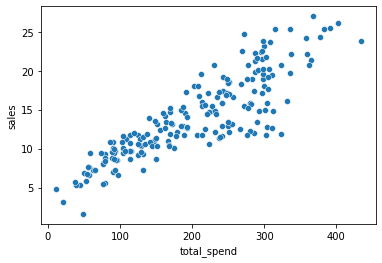

In [ ]:
sns.scatterplot(x='total_spend',y='sales',data=df)

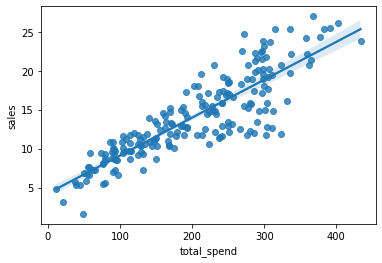

In [ ]:
sns.regplot(x='total_spend',y='sales',data=df)

Let's go ahead and start solving: $$y=mx+b$$

In [ ]:
X = df['total_spend']
y = df['sales']

## Train Model

In [ ]:
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

implement the formula: $$y=mx+b$$

In [ ]:
y =  0.04868788*X + 4.24302822

## Result

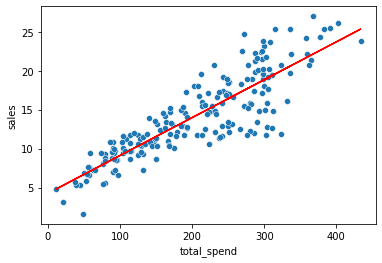

In [ ]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(X,y,color='red')

## Data Inferance

In [ ]:
spend = 200
pred_sales =  0.04868788*spend + 4.24302822

In [ ]:
pred_sales

13.98060422

# Linear Regression with Scikit Learn

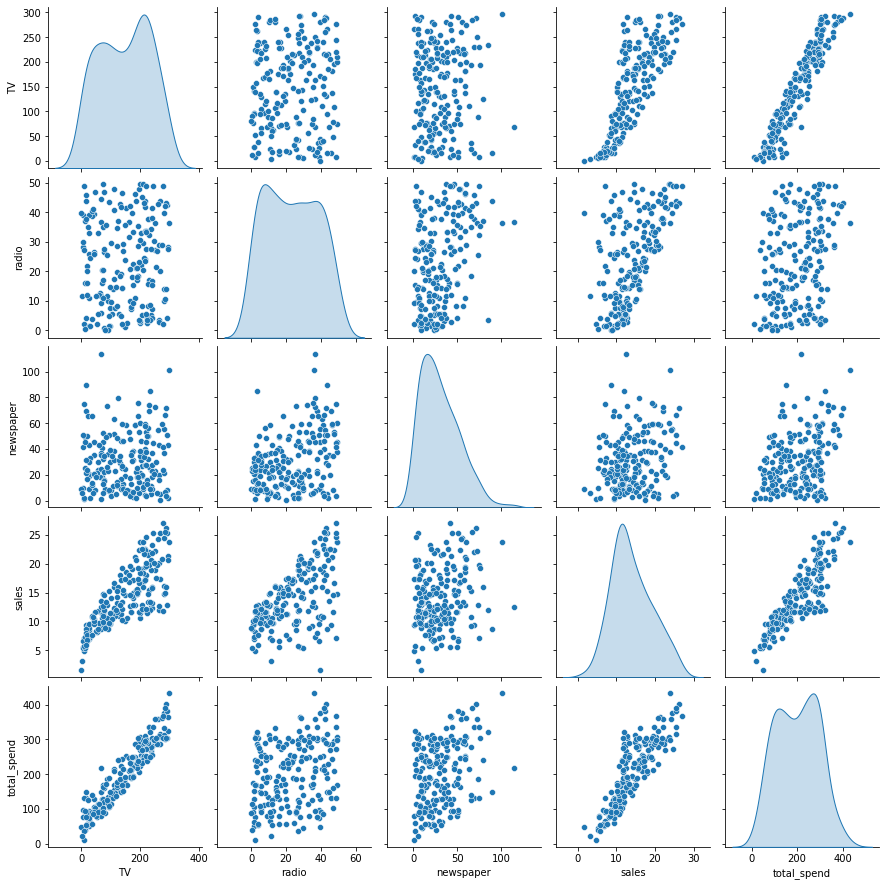

In [ ]:
sns.pairplot(df,diag_kind='kde')

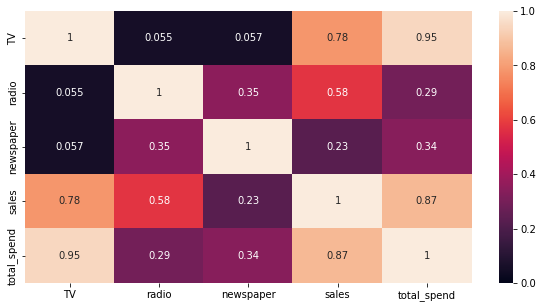

In [ ]:
corr = df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

In [ ]:
X = df.drop(['sales','total_spend'],axis=1)
y = df['sales']

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<img src='https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.png'>


Z-score formula :     

$$
\begin{equation}Z = \frac{x - \bar{x}}{s}\end{equation}
$$

In [ ]:
print(np.round_(X_train_scaled))

[[-1.  1.  4.]
 [-0. -1. -0.]
 [-1. -1.  0.]
 [-2. -0.  1.]
 [-1.  0. -0.]
 [-1. -0. -1.]
 [-2.  0. -1.]
 [ 1. -1.  1.]
 [ 0. -1.  1.]
 [ 1.  2.  1.]
 [-1.  1.  1.]
 [ 1. -1. -0.]
 [ 2. -1. -0.]
 [-0. -1. -1.]
 [ 1. -1. -0.]
 [-2. -1. -1.]
 [ 1.  1. -1.]
 [-1.  1. -1.]
 [ 1. -0. -1.]
 [ 0. -0.  0.]
 [ 1. -0.  2.]
 [ 2.  1.  2.]
 [-1. -2. -1.]
 [ 0.  2.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  2.]
 [ 0. -0. -1.]
 [-1.  2.  0.]
 [-0.  1.  2.]
 [-0.  1. -0.]
 [ 1. -1.  2.]
 [-1. -1. -1.]
 [ 2. -1. -1.]
 [-1. -2. -1.]
 [-1. -1. -1.]
 [ 1.  1.  0.]
 [-1.  1.  1.]
 [ 1.  2.  1.]
 [-2.  0.  0.]
 [ 1. -1. -1.]
 [ 2. -1.  0.]
 [-0. -0.  0.]
 [-1. -1. -0.]
 [ 1.  1. -1.]
 [ 0.  1. -1.]
 [ 1. -0. -0.]
 [-2. -1.  0.]
 [ 1. -1. -1.]
 [ 1.  1. -1.]
 [ 0. -1. -1.]
 [-1. -1.  0.]
 [ 1. -1. -0.]
 [-1.  2. -1.]
 [-1. -0.  0.]
 [ 1. -1. -1.]
 [-0.  0.  1.]
 [-1. -1.  0.]
 [-0.  0. -1.]
 [-0. -0. -1.]
 [-1. -0.  0.]
 [-0. -1. -1.]
 [ 2.  1.  1.]
 [-0. -1. -0.]
 [-1.  1.  2.]
 [ 1. -0. -0.]
 [ 1.  0. -1.]
 [-2. -2. 

## Model Definition

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## Train Model

In [ ]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:
y_pred_test

array([15.68292592, 19.58907536, 11.33442246, 16.97160642,  9.00229777,
        6.8258424 , 20.28370847, 17.25050474,  9.62422935, 19.21261943,
       12.28165709, 13.79124205, 13.63171832, 21.3166205 , 18.4260183 ,
        9.83360121, 15.48826256,  7.50717778,  7.37608168, 20.40569824,
        7.61221263, 18.21702553, 24.75227276, 22.87105326,  7.79566192,
       12.55620637, 21.47155589,  7.89397664, 12.3119109 , 12.41822104,
       10.6650977 , 19.23984433,  9.92216352,  6.53329195, 17.27904496,
        7.60035587,  9.1023379 ,  8.10416927, 10.45284718, 10.49584758])

## Evaluation Model

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **R2** R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  1.2907218211025218
MAE test =  1.1244750006255653
MSE train =  2.968918089281972
MSE test =  2.0634188501214767
RMSE train =  1.7230548712336389
RMSE test =  1.4364605285636904
r2score train =  0.8876537266968316
r2score test =  0.9303140201228004


In [ ]:
df['sales'].mean()

14.022500000000003

## Anscombe's Quartet

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

## No Autocorrelation Test

In [ ]:
df_x = pd.DataFrame(data=X_test_scaled,columns=X.columns)

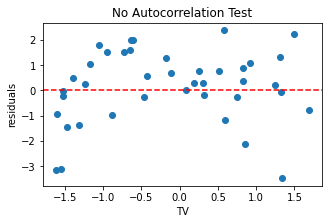

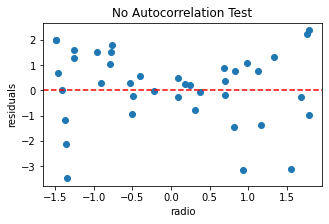

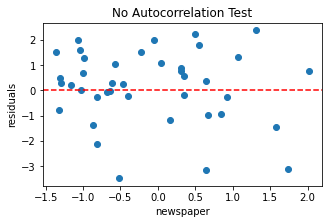

In [ ]:
for col in df_x.columns:
  plt.figure(figsize=(5,3))
  plt.scatter(x=df_x[col],y=y_test-y_pred_test)
  plt.title('No Autocorrelation Test')
  plt.xlabel(col)
  plt.ylabel('residuals')
  plt.axhline(y=0, color='r', linestyle='--')
  plt.show()

## Residual PLot

In [ ]:
test_res = y_test - y_pred_test

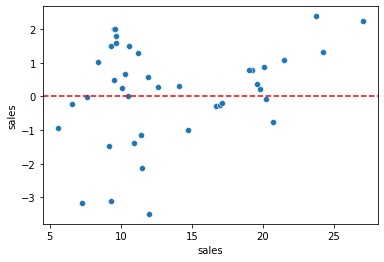

In [ ]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

It's should look random and no clear pattern in order to understand the dataset is valid for linear regression model

## Coefficients

experiment build new model and fit it without scaling data

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X,y)

LinearRegression()

In [ ]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

model fit with scaling data

In [ ]:
model.coef_

array([3.8580371 , 2.77077918, 0.00603985])

In [ ]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,3.858037
radio,2.770779
newspaper,0.006040


In [ ]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
print(df.sales[df.sales == y.max()].index.tolist())

[175]


In [ ]:
df.iloc[175]

TV             276.9
radio           48.9
newspaper       41.8
sales           27.0
total_spend    367.6
Name: 175, dtype: float64

## Model Inference

In [ ]:
new_data = [300,58,5]
new_data_scaled = scaler.transform([new_data])
pred_res = model.predict(new_data_scaled)
print('model predict is : ',pred_res)

model predict is :  [27.51773476]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree=2)

In [ ]:
X_train

,TV,radio,newspaper
16,67.8,36.6,114.0
186,139.5,2.1,26.6
144,96.2,14.8,38.9
121,18.8,21.7,50.4
80,76.4,26.7,22.3
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [ ]:
poly_features = polynomial_converter.fit_transform(X_train)

In [ ]:
poly_feature_test = polynomial_converter.transform(X_test)

In [ ]:
poly_features.shape

(160, 10)

In [ ]:
X_train.shape

(160, 3)

In [ ]:
X_train.iloc[0]

TV            67.8
radio         36.6
newspaper    114.0
Name: 16, dtype: float64

In [ ]:
poly_features[0]

array([1.00000e+00, 6.78000e+01, 3.66000e+01, 1.14000e+02, 4.59684e+03,
       2.48148e+03, 7.72920e+03, 1.33956e+03, 4.17240e+03, 1.29960e+04])

In [ ]:
67.8*36.6

2481.48

In [ ]:
67.8**2

4596.839999999999

## Model Definition & Train Model

In [ ]:
poly_model = LinearRegression()
poly_model.fit(poly_features,y_train)

LinearRegression()

In [ ]:
poly_predict_train = poly_model.predict(poly_features)
poly_predict_test = poly_model.predict(poly_feature_test)

## Evaluation Model

matrics with polynomial

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, poly_predict_train))
print('MAE test = ', mean_absolute_error(y_test, poly_predict_test))

print('MSE train = ', mean_squared_error(y_train, poly_predict_train))
print('MSE test = ', mean_squared_error(y_test, poly_predict_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, poly_predict_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, poly_predict_test)))

print('r2score train = ', r2_score(y_train, poly_predict_train))
print('r2score test = ', r2_score(y_test, poly_predict_test))

MAE train =  0.4315670271636309
MAE test =  0.44310658314798096
MSE train =  0.3807742812065286
MSE test =  0.33749720374184183
RMSE train =  0.6170691056976751
RMSE test =  0.580945095290288
r2score train =  0.9855911917483745
r2score test =  0.9886020119729058


matrics with linear regression

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  1.2907218211025218
MAE test =  1.1244750006255653
MSE train =  2.968918089281972
MSE test =  2.0634188501214767
RMSE train =  1.7230548712336389
RMSE test =  1.4364605285636904
r2score train =  0.8876537266968316
r2score test =  0.9303140201228004


# Ridge Regression (L2)

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10)

In [ ]:
ridge_model.fit(X_train_scaled,y_train)

Ridge(alpha=10)

In [ ]:
ridge_pred_train = ridge_model.predict(X_train_scaled)
ridge_pred_test = ridge_model.predict(X_test_scaled)

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, ridge_pred_train))
print('MAE test = ', mean_absolute_error(y_test, ridge_pred_test))

print('MSE train = ', mean_squared_error(y_train, ridge_pred_train))
print('MSE test = ', mean_squared_error(y_test, ridge_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, ridge_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, ridge_pred_test)))

print('r2score train = ', r2_score(y_train, ridge_pred_train))
print('r2score test = ', r2_score(y_test, ridge_pred_test))

MAE train =  1.3094734762980829
MAE test =  1.1497046988541477
MSE train =  3.0478059220554523
MSE test =  2.201060028039348
RMSE train =  1.745796643958125
RMSE test =  1.483596989764858
r2score train =  0.8846685469934712
r2score test =  0.9256655890230776


# Lasso Regerssion (L1)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso()

In [ ]:
lasso_model.fit(X_train_scaled,y_train)

Lasso()

In [ ]:
lasso_pred_train = lasso_model.predict(X_train_scaled)
lasso_pred_test = lasso_model.predict(X_test_scaled)

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, lasso_pred_train))
print('MAE test = ', mean_absolute_error(y_test, lasso_pred_test))

print('MSE train = ', mean_squared_error(y_train, lasso_pred_train))
print('MSE test = ', mean_squared_error(y_test, lasso_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, lasso_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, lasso_pred_test)))

print('r2score train = ', r2_score(y_train, lasso_pred_train))
print('r2score test = ', r2_score(y_test, lasso_pred_test))

MAE train =  1.6000273116075487
MAE test =  1.583169220317552
MSE train =  4.889705520546719
MSE test =  4.366240069498941
RMSE train =  2.2112678536411456
RMSE test =  2.0895549931741306
r2score train =  0.8149695692964671
r2score test =  0.8525429204040598


In [ ]:
lasso_model.coef_

array([2.89810685, 1.8121523 , 0.        ])

# Elastic Net (L3)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_model = ElasticNet()

In [ ]:
elastic_model.fit(X_train_scaled,y_train)

ElasticNet()

In [ ]:
elastic_pred_train = elastic_model.predict(X_train_scaled)
elastic_pred_test = elastic_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, elastic_pred_train))
print('MAE test = ', mean_absolute_error(y_test, elastic_pred_test))

print('MSE train = ', mean_squared_error(y_train, elastic_pred_train))
print('MSE test = ', mean_squared_error(y_test, elastic_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, elastic_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, elastic_pred_test)))

print('r2score train = ', r2_score(y_train, elastic_pred_train))
print('r2score test = ', r2_score(y_test, elastic_pred_test))

MAE train =  2.012485333018521
MAE test =  2.1909091865690558
MSE train =  7.117070682617273
MSE test =  7.068479775745381
RMSE train =  2.667783852304619
RMSE test =  2.6586612751054584
r2score train =  0.7306842614103025
r2score test =  0.7612826211285282


In [ ]:
elastic_model.coef_

array([2.27237713, 1.55864551, 0.        ])

# Logistic Regression

In [ ]:
df = pd.read_csv('/content/hearing_test.csv')

In [ ]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


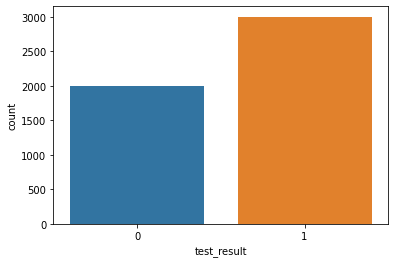

In [ ]:
sns.countplot(data=df,x='test_result')

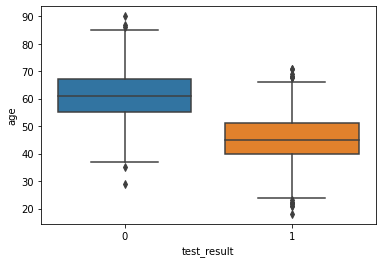

In [ ]:
sns.boxplot(x='test_result',y='age',data=df)

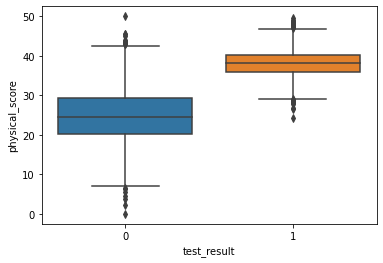

In [ ]:
sns.boxplot(x='test_result',y='physical_score',data=df)

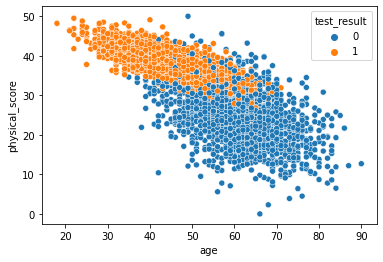

In [ ]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

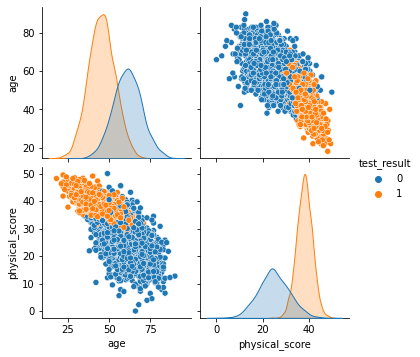

In [ ]:
sns.pairplot(df,hue='test_result')

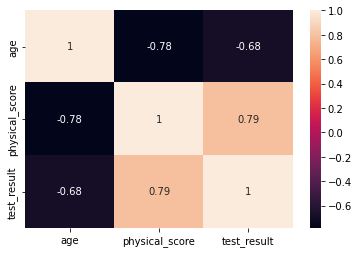

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.drop('test_result',axis=1)
y = df['test_result']

## Train Test Split & Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model Definition

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [ ]:
y_pred_train = log_model.predict(scaled_X_train)
y_pred_test = log_model.predict(scaled_X_test)

In [ ]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  0.914
accuracy score test :  0.919


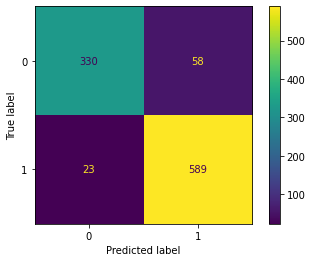

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       388
           1       0.91      0.96      0.94       612

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1612
           1       0.91      0.95      0.93      2388

    accuracy                           0.91      4000
   macro avg       0.92      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000



# Multiclass LogReg

In [ ]:
df = pd.read_csv('/content/iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


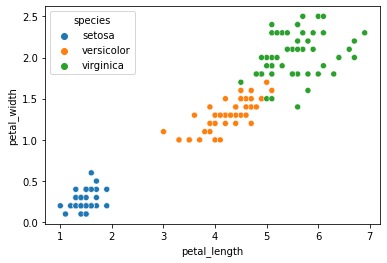

In [ ]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

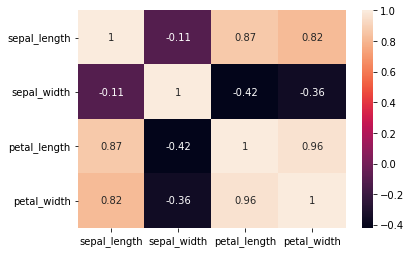

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.drop('species',axis=1)
y = df['species']

## Model Definition

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg_model = LogisticRegression()

## Train Test Split & Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
scaler = RobustScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
logreg_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
logreg_pred_train = logreg_model.predict(X_train)
logreg_pred_test = logreg_model.predict(X_test)

In [ ]:
logreg_pred_test

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

## Evaluation Model

In [ ]:
print('accuracy score train : ',accuracy_score(y_train,logreg_pred_train))
print('accuracy score test : ',accuracy_score(y_test,logreg_pred_test))

accuracy score train :  0.9642857142857143
accuracy score test :  1.0


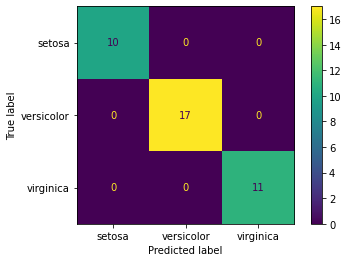

In [ ]:
cm = confusion_matrix(y_test, logreg_pred_test, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

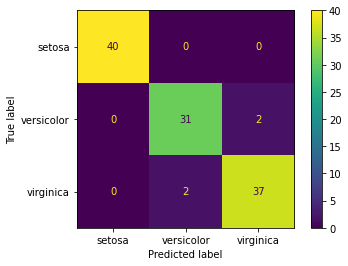

In [ ]:
cm = confusion_matrix(y_train, logreg_pred_train, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train,logreg_pred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.94      0.94      0.94        33
   virginica       0.95      0.95      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



In [ ]:
print(classification_report(y_test,logreg_pred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
print(np.round_(logreg_model.coef_))

[[-0.  1. -2. -1.]
 [ 0. -0. -0. -1.]
 [-0. -1.  2.  2.]]


In [ ]:
logreg_model.coef_

array([[-0.3833618 ,  0.90251194, -2.25175865, -0.98214783],
       [ 0.48359237, -0.32483825, -0.10616975, -0.85816983],
       [-0.10023056, -0.57767369,  2.3579284 ,  1.84031766]])

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
log_model.coef_

array([[-5.95301837, 13.90687403]])